In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/home/kyle/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Get the data for the training and testing

In [4]:
digits_train=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra",header=None)

In [6]:
digits_test=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes",header=None)

In [27]:
X_train=digits_train[np.arange(64)]

In [30]:
y_train=digits_train[64]

In [31]:
X_test=digits_test[np.arange(64)]

In [32]:
y_test=digits_test[64]

## Kmeans Model

In [34]:
from sklearn.cluster import KMeans

/home/kyle/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [35]:
kmeans=KMeans(n_clusters=10)

In [36]:
help(kmeans.fit)

Help on method fit in module sklearn.cluster.k_means_:

fit(X, y=None) method of sklearn.cluster.k_means_.KMeans instance
    Compute k-means clustering.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape=(n_samples, n_features)
        Training instances to cluster.
    
    y : Ignored



In [45]:
X_train.shape

(3823, 64)

In [46]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
y_pred=kmeans.predict(X_test)

In [48]:
y_pred

array([2, 0, 0, ..., 0, 1, 4], dtype=int32)

## Evaluation of K_means Performance 

In [49]:
#Since the data is labellized, ARI(Adjusted Rand Index) will be a good choice 

In [50]:
from sklearn import metrics

In [51]:
print(metrics.adjusted_rand_score(y_test,y_pred))

0.6572850870285234


## More about K-Means

In [52]:
# in the case where  the data is not labellized, the Silhouette Coefficient  would be good choice

In [53]:
import numpy as np

In [54]:
from sklearn.cluster import KMeans

In [55]:
from sklearn.metrics import silhouette_score

In [56]:
import matplotlib.pyplot as plt

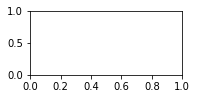

In [57]:
plt.subplot(3,2,1)

In [71]:
x1=np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])

In [72]:
x2=np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])

In [74]:
X=np.array(list(zip(x1,x2))).reshape(len(x1),2)

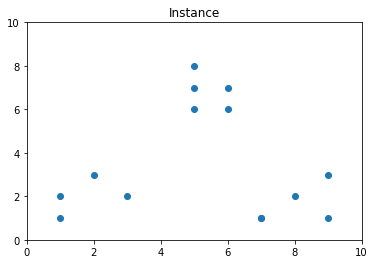

In [85]:
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Instance')
plt.scatter(x1,x2)

In [82]:
colors=['b','g','r','c','m','y','k','b']

In [83]:
markers=['o','s','D','v','^','p','*','+']

In [84]:
clusters=[2,3,4,5,8]

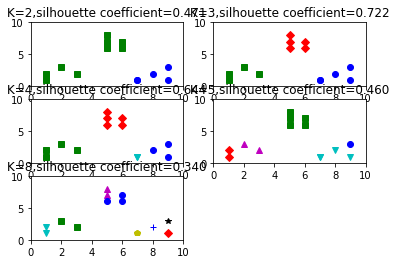

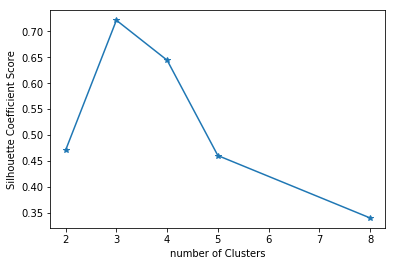

In [95]:
subplot_counter=0
sc_scores=[]
for t in clusters:
    subplot_counter+=1
    plt.subplot(3,2,subplot_counter)
    kmeans_model=KMeans(n_clusters=t).fit(X)
    
    for i,l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i],x2[i],color=colors[l],marker=markers[l],ls="None")
    plt.xlim([0,10])
    plt.ylim([0,10])
    sc_score=silhouette_score(X,kmeans_model.labels_,metric='euclidean')
    sc_scores.append(sc_score)
    plt.title("K=%s,silhouette coefficient=%0.03f"%(t,sc_score))

plt.figure()
plt.plot(clusters,sc_scores,'*-')
plt.xlabel("number of Clusters")
plt.ylabel("Silhouette Coefficient Score")
plt.show()